In [1]:
import psycopg2
from config import *
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd

In [2]:
cred = params # load credentials from config file

# connect to the remote postgres database server
connection = psycopg2.connect(**cred)
cursor = connection.cursor()

### Average number of pull requests per contributor who did at least 1 pull request (rounded to the nearest integer).

In [3]:
average_PR_per_active_contributor = """SELECT ROUND(AVG(pull_request_count),0)
                  FROM
                  (SELECT
                      user_id,
                      count(*) AS pull_request_count
                  FROM pulls
                  GROUP BY
                  user_id) average_PR_per_active_contributor;
                """

cursor.execute(average_PR_per_active_contributor)
records = cursor.fetchall()
for record in records:
    print(record[0])

7


### Average number of pull requests per contributor (rounded to the nearest integer)

In [4]:
average_PR_per_contributor = """
                SELECT ((
                (SELECT COUNT(pulls.user_id)
                    FROM pulls) /
                (SELECT COUNT(contributors.id)
                    FROM contributors) )) AS average_PR_per_contributor
                """
cursor.execute(average_PR_per_contributor)
records = cursor.fetchall()
for record in records:
    print(record[0])

57


### Maximum number of commits per week

In [8]:
max_commit_per_week = """
                    SELECT date(date_trunc('week', commit_date)) AS weekly_commits,
                            COUNT(*)
                    FROM 
                        commits
                    GROUP BY 
                        weekly_commits
                    ORDER BY 
                        count(*) desc limit 1; 
                    """
cursor.execute(max_commit_per_week)
records = cursor.fetchall()
for record in records:
    print(f"For pandas repository, the maximum number of commits in a week is {record[1]}. It was in the week of {record[0]}.")

For pandas repository, the maximum number of commits in a week is 168. It was in the week of 2019-12-30.


Text(0, 0.5, 'Number of commits')

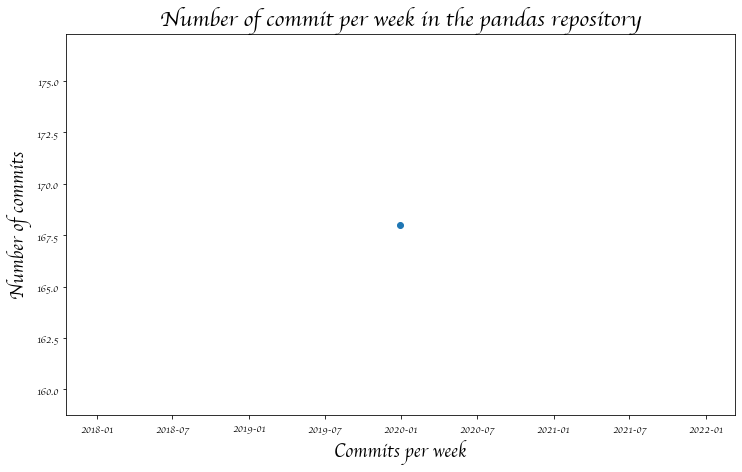

In [9]:
weekly_commit = """
                    SELECT date(date_trunc('week', commit_date)) AS weekly_commits,
                            COUNT(*)
                    FROM 
                        commits
                    GROUP BY 
                        weekly_commits
                    ORDER BY 
                        count(*); 
                    """
cursor.execute(max_commit_per_week)
records = cursor.fetchall()

fig2 = []

for row in records:
    fig2.append(row)
    
x, y = zip(*fig2)

plt.figure(figsize=(12,7))
plt.scatter(x, y)
plt.rcParams["font.family"] = "cursive"
plt.title("Number of commit per week in the pandas repository", fontdict={'fontsize':22});
plt.xlabel("Commits per week", fontsize=18)
plt.ylabel("Number of commits", fontsize=18)


### Minimum number of days of an issue being open